In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\SUKI\hdb_data.csv")


In [13]:
df.shape

(181262, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181262 entries, 0 to 181261
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      181262 non-null  int64  
 1   town            181262 non-null  object 
 2   flat_type       181262 non-null  object 
 3   flat_model      181262 non-null  object 
 4   resale_price    181262 non-null  float64
 5   date            181262 non-null  object 
 6   year            181262 non-null  int64  
 7   flat_age        181262 non-null  int64  
 8   sqft            181262 non-null  float64
 9   price_per_sqft  181262 non-null  float64
 10  floor_rise      181262 non-null  object 
 11  flat_condition  181262 non-null  object 
 12  region          181262 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 18.0+ MB


In [17]:
df.describe()

,Unnamed: 0,resale_price,year,flat_age,sqft,price_per_sqft
count,181262.000000,1.812620e+05,181262.000000,181262.000000,181262.000000,181262.000000
mean,90630.500000,4.978643e+05,2020.449074,24.435232,1045.736299,480.570759
std,52325.976584,1.726320e+05,2.124326,13.924125,258.595855,134.177448
min,0.000000,1.400000e+05,2017.000000,1.000000,334.000000,194.000000
25%,45315.250000,3.700000e+05,2019.000000,11.000000,883.000000,387.000000
50%,90630.500000,4.680000e+05,2021.000000,25.000000,1001.000000,455.000000
75%,135945.750000,5.920000e+05,2022.000000,36.000000,1206.000000,539.000000
max,181261.000000,1.588000e+06,2024.000000,58.000000,2680.000000,1449.000000


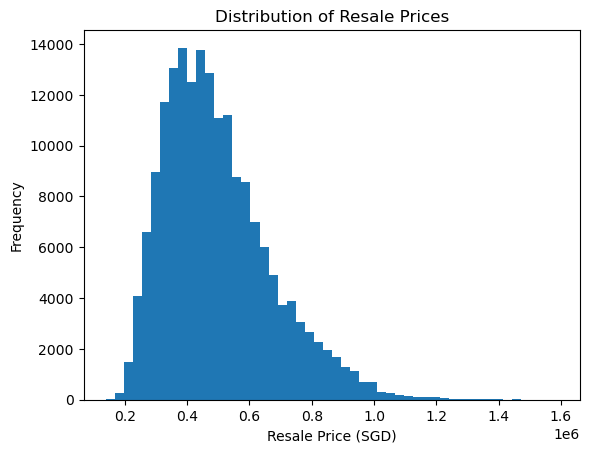

In [19]:
plt.figure()
plt.hist(df['resale_price'], bins=50)
plt.title("Distribution of Resale Prices")
plt.xlabel("Resale Price (SGD)")
plt.ylabel("Frequency")
plt.show()

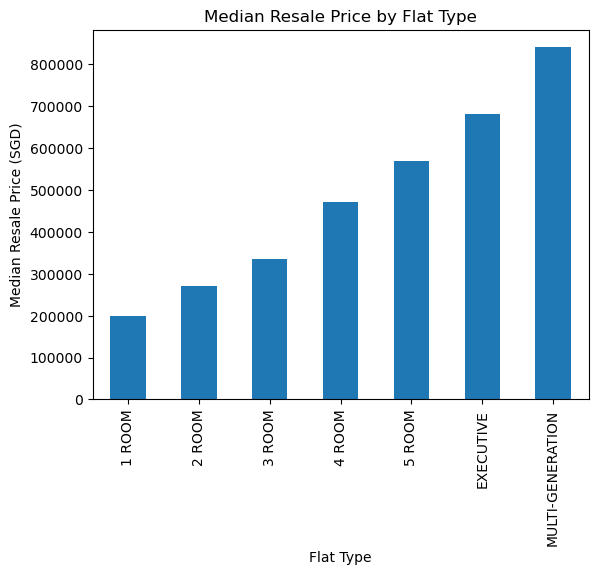

In [31]:
flat_type_price = (
                  df.groupby('flat_type')['resale_price']
                  .median()
                  .sort_values())
flat_type_price.plot(kind='bar')
plt.title("Median Resale Price by Flat Type")
plt.xlabel("Flat Type")
plt.ylabel("Median Resale Price (SGD)")
plt.show()

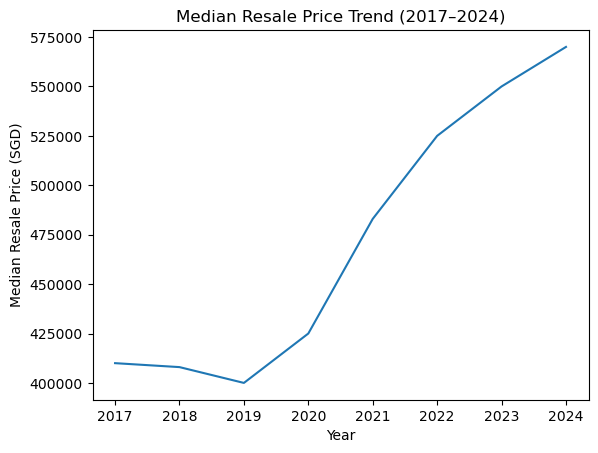

In [33]:
yearly_price = (df.groupby('year')['resale_price'].median())
yearly_price.plot()
plt.title("Median Resale Price Trend (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Median Resale Price (SGD)")
plt.show()

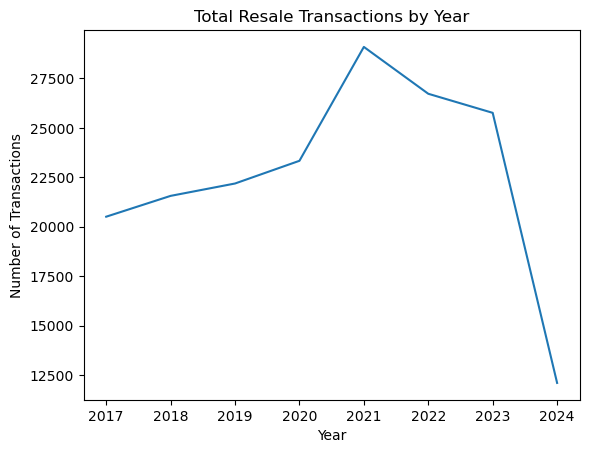

In [34]:
yearly_txn = df.groupby('year').size()
yearly_txn.plot()
plt.title("Total Resale Transactions by Year")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.show()

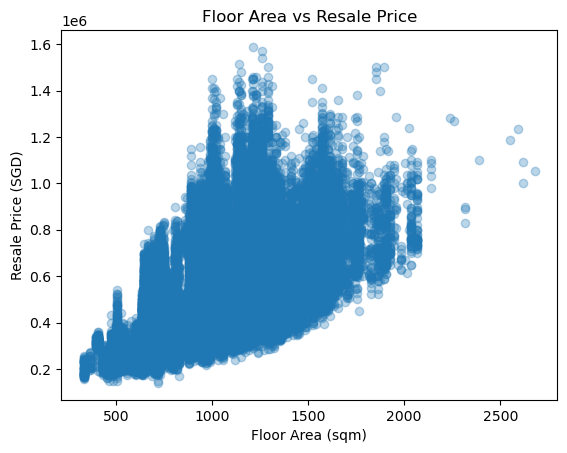

In [35]:
plt.figure()
plt.scatter(df['sqft'], df['resale_price'], alpha=0.3)
plt.title("Floor Area vs Resale Price")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price (SGD)")
plt.show()

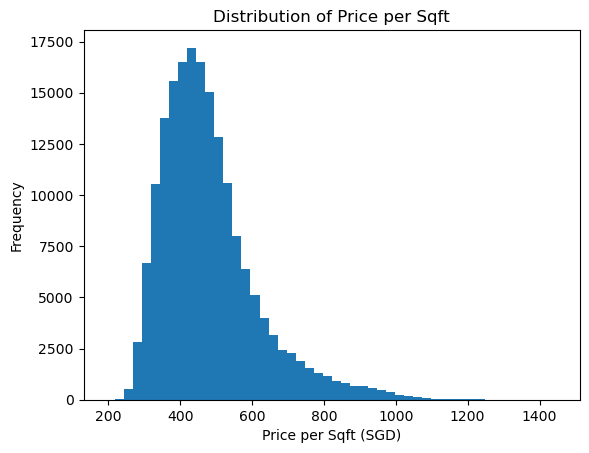

In [26]:
plt.figure()
plt.hist(df['price_per_sqft'], bins=50)
plt.title("Distribution of Price per Sqft")
plt.xlabel("Price per Sqft (SGD)")
plt.ylabel("Frequency")
plt.show()


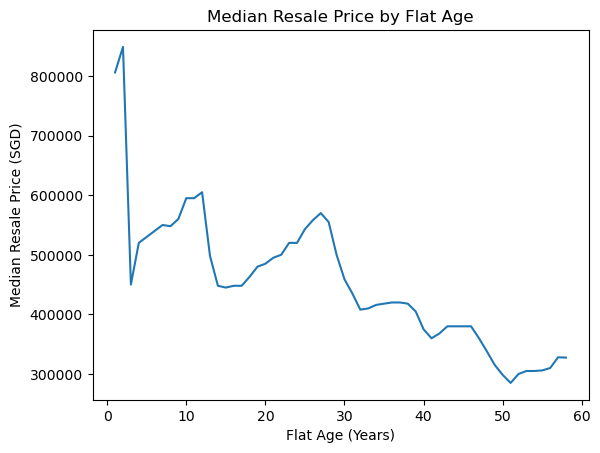

In [36]:
age_price = (df.groupby('flat_age')['resale_price'].median())
age_price.plot()
plt.title("Median Resale Price by Flat Age")
plt.xlabel("Flat Age (Years)")
plt.ylabel("Median Resale Price (SGD)")
plt.show()

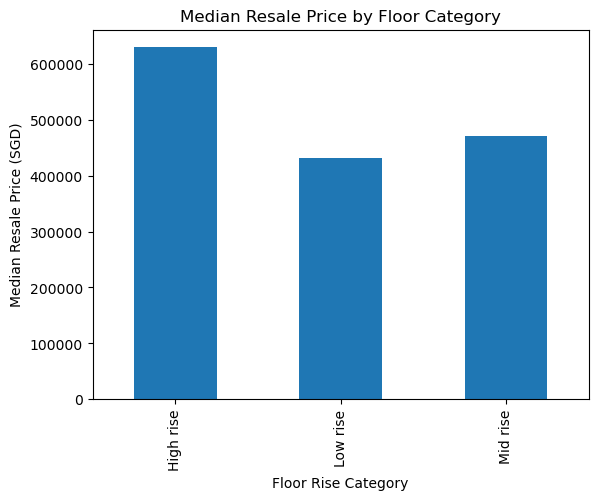

In [38]:
floor_price = (df.groupby('floor_rise')['resale_price'].median())
floor_price.plot(kind='bar')
plt.title("Median Resale Price by Floor Category")
plt.xlabel("Floor Rise Category")
plt.ylabel("Median Resale Price (SGD)")
plt.show()

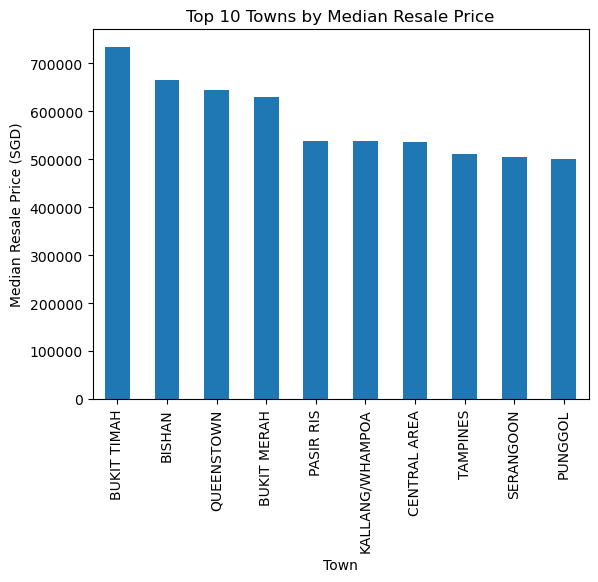

In [39]:
top_towns = (df.groupby('town')['resale_price']
            .median()
            .sort_values(ascending=False)
            .head(10)
            )
top_towns.plot(kind='bar')
plt.title("Top 10 Towns by Median Resale Price")
plt.xlabel("Town")
plt.ylabel("Median Resale Price (SGD)")
plt.show()

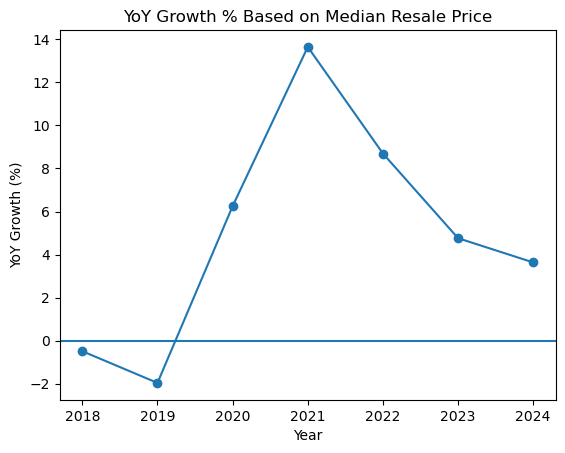

In [47]:
yearly_median = (df.groupby('year')['resale_price']
                .median()
                .reset_index()
                .sort_values('year')
                )
yearly_median
yearly_median['yoy_growth_pct'] = (yearly_median['resale_price'].pct_change() * 100)
yearly_median

plt.figure()
plt.plot(
    yearly_median['year'],
    yearly_median['yoy_growth_pct'],
    marker='o'
        )
plt.axhline(0)
plt.title("YoY Growth % Based on Median Resale Price")
plt.xlabel("Year")
plt.ylabel("YoY Growth (%)")
plt.show()